## Import necessary packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import imageio
import skimage.io
import numpy as np  
import cv2 as cv

## Cutting ROI

### Manually

In [660]:
cap =cv.VideoCapture('white20s.MOV')
fps = cap.get(cv.CAP_PROP_FPS)
size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
y,x,h,w = 200, 200, 800, 800
fourcc = cv.VideoWriter_fourcc(*'XVID')
out=cv.VideoWriter("out.avi",-1,fps,(h,w))#'MJPG'对windows没有用
                   
        
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        frame = frame[y:y+h, x:x+w]

        # write the flipped frame
        out.write(frame)

        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

### Auto

In [42]:
# Find the ROI
cap =cv.VideoCapture('wrist_white_20s-alpha50-sigma3-band8.000000e-01-1.800000e+00-refFrame200-withoutlarge.avi')
#cap =cv.VideoCapture('wrist_white_cut_1.avi')
ret,frame = cap.read()
cv.namedWindow("Demo", cv.WINDOW_AUTOSIZE)
# 可以在图片上选择roi区域
x, y, w, h = cv.selectROI("Demo", frame, True, False)
track_window = (x, y, w, h)
while True:
    k = cv.waitKey(60) & 0xff
    if k == 27:
        break
cv.destroyAllWindows()
cap.release()
#roi = frame[y:y+h, x:x+w]

In [19]:
y, y+h, x, x+w

(314, 591, 274, 574)

In [43]:
print("The width and height of ROI is ('w'=%d, 'h'=%d)" % (w,h)  )

The width and height of ROI is ('w'=457, 'h'=408)


In [44]:
cap = cv.VideoCapture('wrist_white_20s-alpha50-sigma3-band8.000000e-01-1.800000e+00-refFrame200-withoutlarge.avi')
fps = cap.get(cv.CAP_PROP_FPS)
#size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
#        int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv.VideoWriter_fourcc(*'XVID')
out=cv.VideoWriter("out.avi",-1,fps,(w,h))#'MJPG'对windows没有用

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = frame[y:y+h, x:x+w]

        # write the flipped frame
        out.write(frame)

        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [ ]:
##############################################################################################
'Cutting finished'

## Choosing intersted Points

In [45]:
import numpy as np
import cv2
# We first record the first frame
cap = cv2.VideoCapture('out.avi')
ret, old_frame = cap.read()
cv2.imwrite("out_1st.png", old_frame)

True

In [46]:
img = cv2.imread("out_1st.png")
#print img.shape
history = []
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        print (xy)
        history.append([x, y])
        cv2.circle(img, (x, y), 1, (255, 0, 0), thickness = -1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0,0,0), thickness = 1)
        cv2.imshow("image", img)

cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)


while(True):
    
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyWindow("image")
        break
    '''
    try:
        cv2.waitKey(0)
    except Exception:

        cv2.destroyWindow("image")
        break
    '''


        
#cv2.waitKey(0)
#cv2.destroyAllWindow()



184,235
31,81
29,368
377,65


In [47]:
my_chosen_p0 = np.array(history, dtype='f').reshape(-1,1,2)
my_chosen_p0

array([[[184., 235.]],

       [[ 31.,  81.]],

       [[ 29., 368.]],

       [[377.,  65.]]], dtype=float32)

In [48]:
#cap = cv2.VideoCapture('white20s.MOV')
cap = cv2.VideoCapture('C:\\Users\\46541\\Desktop\\opticalFlow\\out.avi')
size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out=cv.VideoWriter("OF_ohand_ut.avi",-1,fps,size)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.2,
                       minDistance = 30,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow 
# criteria 是算法终止条件  https://blog.csdn.net/a_31415926/article/details/50515835 
lk_params = dict( winSize  = (25,25),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 6, 0.01))


# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# 交点检测 得到的p0
#p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# 我自己选择的p0
p0 = my_chosen_p0

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

num_frames = 0
points = []
while(1):
    ret,frame = cap.read()
    if not ret:
        break
    num_frames += 1
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    #pl表示光流检测后的角点位置，st表示是否是运动的角点，err表示是否出错
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    points.append(good_new)
    

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 3)
        frame = cv2.circle(frame,(a,b),4,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    #cv2.imshow('frame', frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
    out.write(frame)

cv2.destroyAllWindows()
cap.release()

In [652]:
num_frames

608

In [412]:
np.shape(points), my_chosen_p0, len(my_chosen_p0),points[0]

((608,), array([[[159., 163.]],
 
        [[ 43., 342.]]], dtype=float32), 2, array([[159.4029  , 163.10982 ],
        [ 43.338398, 341.93796 ]], dtype=float32))

In [421]:
points[1][0], points[1][1], points[1][1] - my_chosen_p0[1], points[1][0] + points[1][1] - my_chosen_p0[1]

(array([157.32393, 163.70277], dtype=float32),
 array([ 43.339523, 342.05344 ], dtype=float32),
 array([[0.33952332, 0.05343628]], dtype=float32),
 array([[157.66345, 163.75623]], dtype=float32))

In [528]:
my_chosen_p0, my_chosen_p0[1], my_chosen_p0[2]

(array([[[439., 505.]],
 
        [[ 99., 183.]],
 
        [[614.,  66.]],
 
        [[ 79., 606.]],
 
        [[723., 570.]]], dtype=float32),
 array([[ 99., 183.]], dtype=float32),
 array([[614.,  66.]], dtype=float32))

In [548]:
cc = [points[1][1] - my_chosen_p0[1], points[1][2] - my_chosen_p0[2], points[1][3] - my_chosen_p0[3], points[1][4] - my_chosen_p0[4]]

In [550]:
np.mean(cc, axis=0)

array([[0.33950806, 0.0110817 ]], dtype=float32)

In [565]:
deltas = []
for j in range(1, 5):
    deltas.append(points[1][j] - my_chosen_p0[j])
delta = np.mean(deltas, axis=0)

In [577]:
len(my_chosen_p0)

4

## Calculating the distance plot 

In [9]:
import matplotlib.pyplot as plt

In [638]:
def single_tracking_distance(starting, points):
    # this function can only track single point
    distance = []
    for i in range(len(points)-1):
        if i == 0:
            d = np.sqrt(np.sum((points[i] - starting)**2))
            distance.append(d)
        else:
            #d = np.sqrt(np.sum((points[i] - points[i-1])**2))
            d = np.sqrt(np.sum((points[i] - starting)**2))
            distance.append(d)
    return distance

In [639]:
def multiple_tracking_distance(starting, points):
    # This function can track multiple points
    num_points = len(starting)
    distance = []
    for i in range(len(points) - 1):
        if i == 0:
            temp_dis = []
            for j in range(num_points):
                temp_dis.append( np.sqrt(np.sum((points[i][j] - starting[j]) ** 2 ))  )
            distance.append( np.mean(temp_dis) )
        else:
            temp_dis = []
            for j in range(num_points):
                temp_dis.append( np.sqrt(np.sum((points[i][j] - starting[j])**2)) )
            
            distance.append(np.mean(temp_dis))
    return distance
    

In [640]:
def tracking_dis_diff(starting, points):
    num_points = len(starting)
    if num_points != 2:
        print("Too Much Points!")
        return
    
    distance = []
    for i in range(len(points) - 1):
        
        # no ROI
        delta = points[i][1] - starting[1]
        # ROI
        temp = points[i][0] - delta - starting[0]
        distance.append( np.sqrt(np.sum(temp**2)) )
    return distance

In [10]:
def tracking_remove_global(starting, points):
    # this function is to remove the golbal motion simply by taking the mean of points from none ROI region
    # requirements: The first point is what you are interested in; The remaining are from the 
    num_points = len(starting)
    if num_points <= 2:
        print("Too few points!")
        return
    
    distance = []
    for i in range(len(points) - 1):
        
        # no ROI 
        deltas = []
        for j in range(1, num_points):
            deltas.append(points[i][j] - starting[j])
        delta = np.mean(deltas, axis=0)
        # ROI 
        temp = points[i][0] - delta - starting[0]
        distance.append( np.sqrt(np.sum(temp**2)) )
        
    return distance
        
    

In [11]:
def tracking_remove_global_avg_ROI(starting, points, num_ROI):
    # this function is to remove the golbal motion simply by taking the mean of points from none ROI region
    # requirements: The first num_ROI points are what you are interested in; The remaining are from the 
    num_points = len(starting)  # the number of points in total
    if num_points <= 2:
        print("Too few points!")
        return
    
    distance = []
    for i in range(len(points) - 1):
        
        # no ROI 
        deltas = []
        for j in range(num_ROI, num_points):
            deltas.append(points[i][j] - starting[j])
        delta = np.mean(deltas, axis=0)
        # ROI
        mains = []
        for k in range(num_ROI):
            mains.append(points[i][k] - starting[k])
        main = np.mean(mains, axis=0)
        temp = main - delta - starting[0]
        distance.append( np.sqrt(np.sum(temp**2)) )
        
    return distance

In [ ]:
'''
# 目前最好看的点
array([[[444., 481.]],

       [[178., 156.]]], dtype=float32)

'''

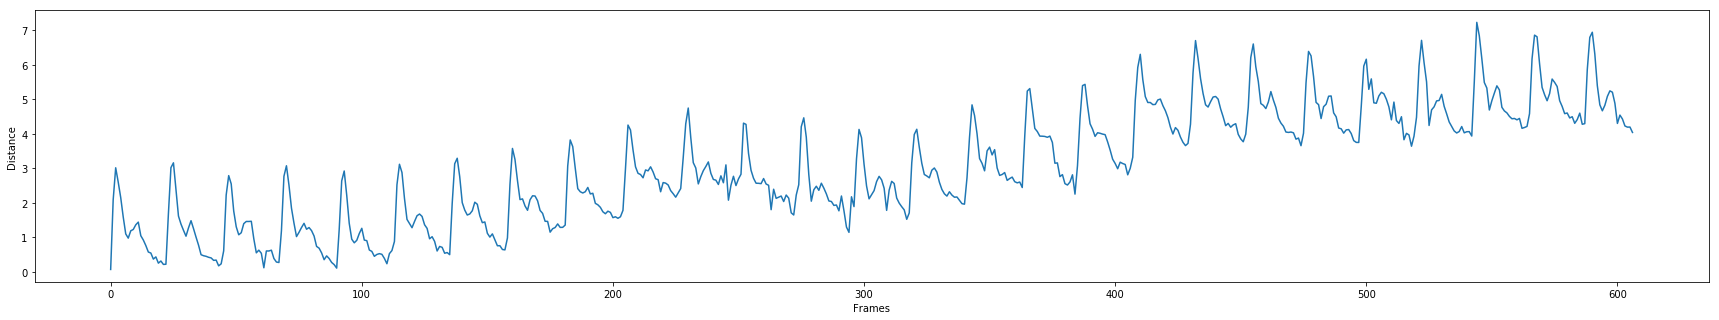

In [13]:
# dis = sibgle_tracking_distance(my_chosen_p0, points)
# dis = multiple_tracking_distance(my_chosen_p0, points)
# dis = tracking_dis_diff(my_chosen_p0, points)
dis = tracking_remove_global(my_chosen_p0, points)
plt.plot(dis)
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.show()

## FIR filter

In [14]:
from scipy import signal

def fda(x_1,Fstop1,Fstop2): #（输入的信号，截止频率下限，截止频率上限）
    fs = 30
    b, a = signal.butter(8, [2.0*Fstop1/fs,2.0*Fstop2/fs], 'bandpass')
    # print(b, a)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.margins(0, 0.1)
    plt.show()
    filtedData = signal.filtfilt(b,a,x_1)
    return filtedData

def fda2(x_1,Fc):  #（输入的信号，限制频率）
    b, a = signal.butter(8,2.0*Fc/1000, 'lowpass')  
    filtedData = signal.filtfilt(b, a,x_1) 
    return filtedData

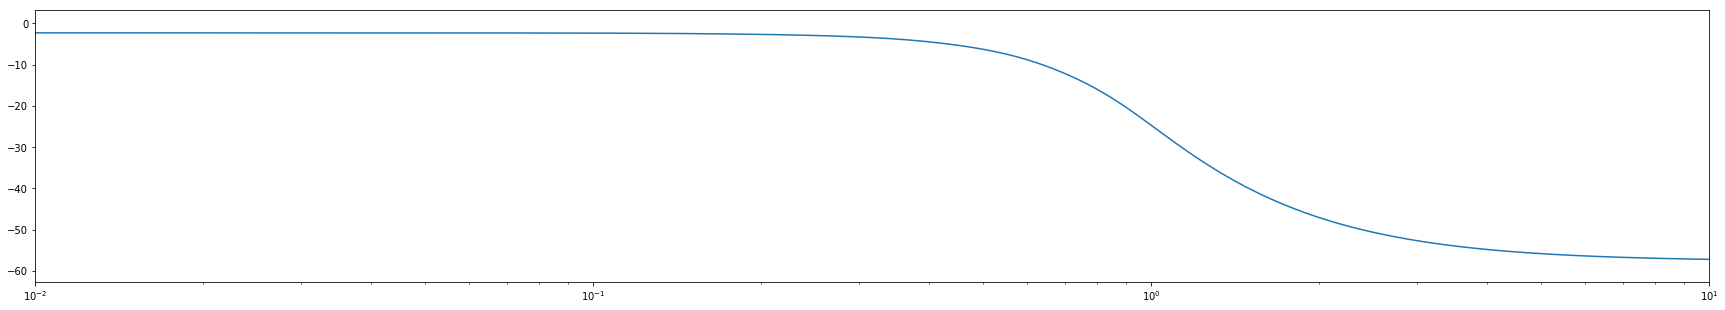

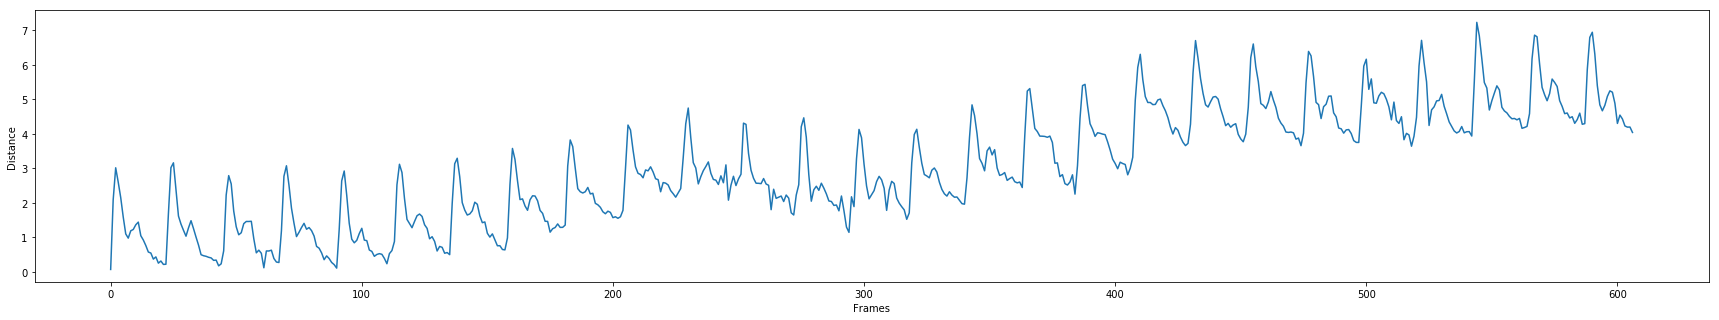

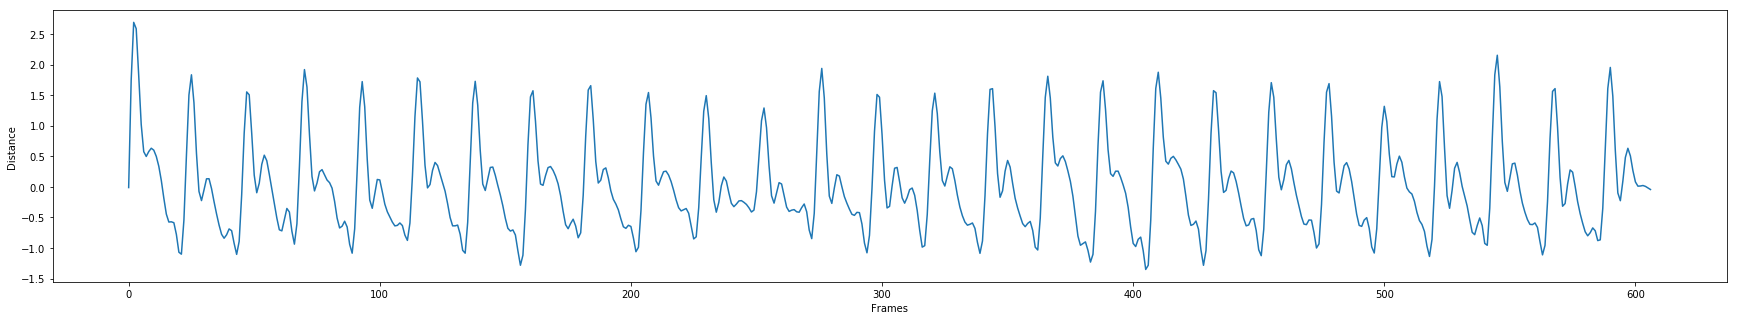

In [15]:
dis_filter = fda(dis,0.5, 6)
plt.plot(dis)
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.show()
plt.plot(dis_filter)
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.show()